# Projeto de engenharia de atributos 

In [1]:
# Importando as bibliotecas
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import watermark
import warnings
import missingno as msg
from tqdm import tqdm
warnings.filterwarnings('ignore')

In [2]:
# Marca d'agua e versões
%reload_ext watermark
%watermark --iversion
%watermark -a "Guilherme"

seaborn   : 0.13.2
watermark : 2.5.0
numpy     : 1.26.4
pandas    : 2.2.2
matplotlib: 3.9.2
re        : 2.2.1
missingno : 0.5.2

Author: Guilherme



In [3]:
# Funções utilitárias

def analise_exploratoria(df):

    '''
    Gera análises exploratórias nos dados

    Esta função cria percentuais de valores ausentes no dataframe e nos atributos e faz a correlação e entre as variáveis.

    Parametros:
    ----------
        df (pd.Series): Série do pandas contendo os dados a serem plotados. 
    ----------
       Gráficos e tabelas informativas.
    '''

    
    print("🧪 [ Análise de Variáveis ]")
    print("➖" * 30)
    df.info()
    
    print("\n")
    
     
    print("🚫 [ Percentual de Valores Ausentes ]")
    print("🧹 Útil para ver onde pode ser necessário limpar os dados")
    print("➖" * 30)    
    display(df.isna().sum() / len(df) * 100)

    print("Visualização de nulos")
    msg.matrix(df, sparkline=False)
    
    print("\n")
    
    print("🔠 [ Distribuição de Variáveis Categóricas ]")
    print("📌 Frequência de cada valor por coluna do tipo 'object'")
    print("➖" * 30)
    colunas_object = df.select_dtypes(include='object')

    for col in colunas_object.columns:

        qtd_valores_unicos = df[col].unique()

        if len(qtd_valores_unicos) < 15:
            print(f"🎯 Coluna: {col}")
            print(colunas_object[col].value_counts(dropna =False), '\n')
        else:
            print('\n')
            print(col + ': ' + str(len(qtd_valores_unicos)) + ' Valores únicos')
            print('\n')
            
    print("\n")
    
    print("Análise de correlação")
    correlacao =df.select_dtypes(exclude='object').corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(
    correlacao,
    annot=True,                # Mostra os valores de correlação
    fmt=".2f",                 # Formato com duas casas decimais
    cmap="coolwarm",          # Paleta de cores mais contrastante
    vmin=-1, vmax=1,          # Escala fixa para facilitar comparação
    linewidths=0.5,           # Linhas entre os quadrantes
    linecolor='gray'          # Cor das linhas
    )
    
    plt.title("Mapa de Correlação Entre Variáveis", fontsize=14, pad=12)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [64]:
# Importando o dataframe para análise exploratória
df = pd.read_csv('dataset.csv')

# Análise exploratória e limpeza

🧪 [ Análise de Variáveis ]
➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  n

encounter_id                 0.000000
patient_nbr                  0.000000
race                         0.000000
gender                       0.000000
age                          0.000000
weight                       0.000000
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                   0.000000
medical_specialty            0.000000
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.000000
diag_2                       0.000000
diag_3                       0.000000
number_diagnoses             0.000000
max_glu_serum               94.746772
A1Cresult                   83.277322
metformin                    0.000000
repaglinide                  0.000000
nateglinide 

Visualização de nulos


🔠 [ Distribuição de Variáveis Categóricas ]
📌 Frequência de cada valor por coluna do tipo 'object'
➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖
🎯 Coluna: race
race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64 

🎯 Coluna: gender
gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64 

🎯 Coluna: age
age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64 

🎯 Coluna: weight
weight
?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: count, dtype: int64 



payer_code: 18 Valores únicos




medical_specialty

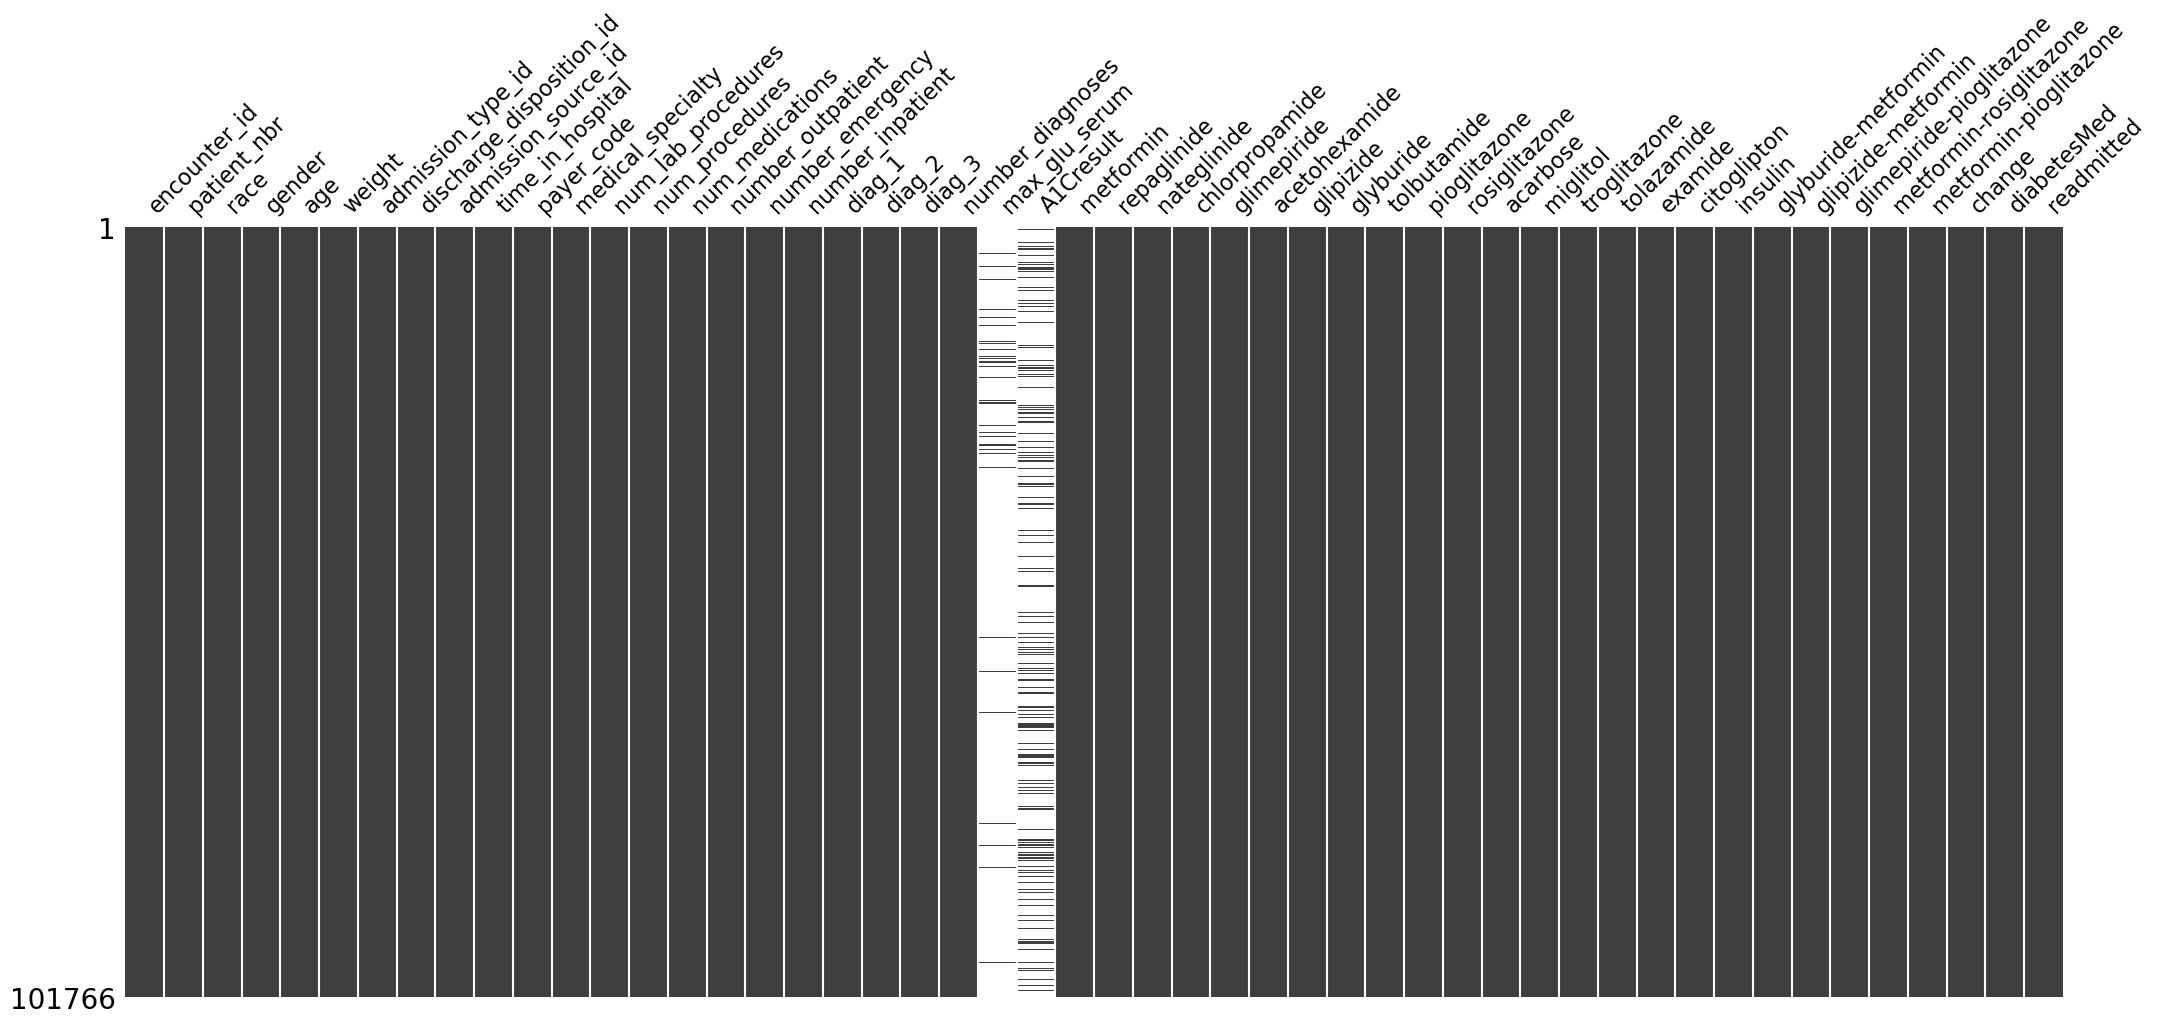

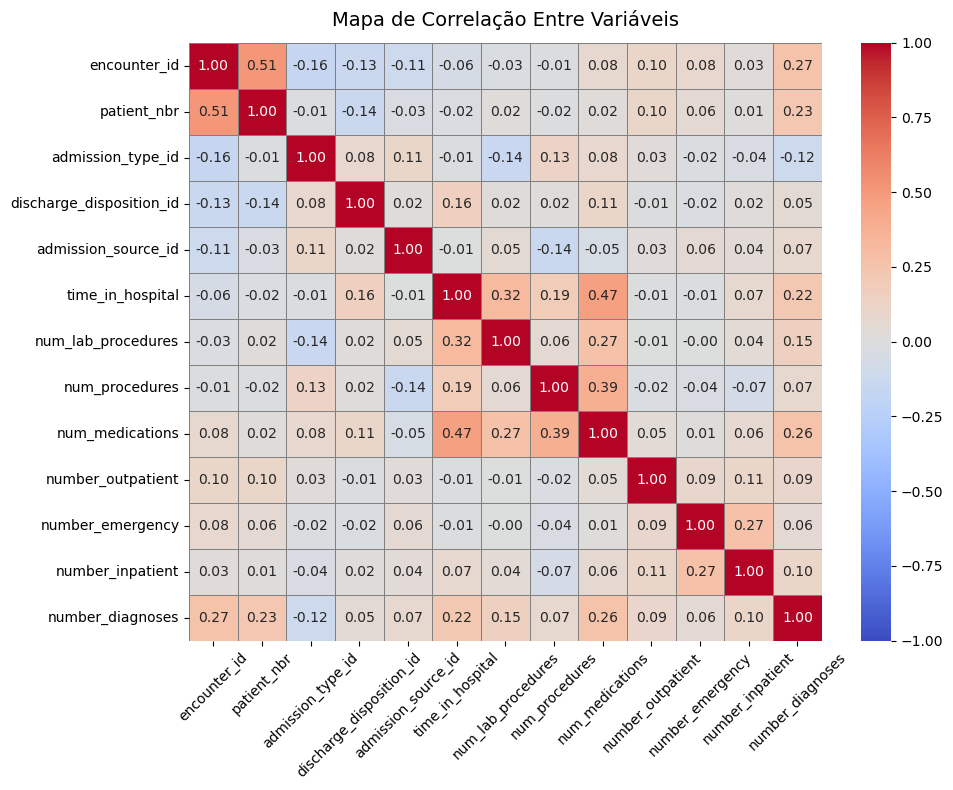

In [11]:
# Realizando a análise exploratória
analise_exploratoria(df)

Problemas identificados no dataset:

1 - Valores ausentes:
    As coluinas max_glu_serum e A1Cresult possuem um % alto de valores ausentes (94.7 e 83.2 respectivamente)

2 - Temos pontos de interrogação como registro em algumas colunas

3 - Temos 3 Unknown/Invalid na coluna de gender



In [5]:
# Colunas que possuem interrogação
colunas_com_interrogacao = df.isin(['?']).any()
colunas_com_interrogacao = colunas_com_interrogacao[colunas_com_interrogacao]

In [6]:
# Imprimindo o resultado
colunas_com_interrogacao

race                 True
weight               True
payer_code           True
medical_specialty    True
diag_1               True
diag_2               True
diag_3               True
dtype: bool

In [4]:
# Verificando o percentual de Valores ausentes no formato de ? 

for col in df.columns:

    if df[col].dtype == object:

        if df[col][df[col] == '?'].count() > 0:

            print('\nColuna',col, 'tem', df[col][df[col] =='?'].count() , 'valores com caracter "?"')
            print('isso representa', round(df[col][df[col] =='?'].count() / df.shape[0]  * 100,2),'%')


Coluna race tem 2273 valores com caracter "?"
isso representa 2.23 %

Coluna weight tem 98569 valores com caracter "?"
isso representa 96.86 %

Coluna payer_code tem 40256 valores com caracter "?"
isso representa 39.56 %

Coluna medical_specialty tem 49949 valores com caracter "?"
isso representa 49.08 %

Coluna diag_1 tem 21 valores com caracter "?"
isso representa 0.02 %

Coluna diag_2 tem 358 valores com caracter "?"
isso representa 0.35 %

Coluna diag_3 tem 1423 valores com caracter "?"
isso representa 1.4 %


In [10]:
# A coluna Gender também tem caracteres que precisamos tratar

print('\nColuna gender tem', df['gender'][df['gender'] == 'Unknown/Invalid'].count(), 'valores com Unknown/Invalid')
print('\nIsso Representa', round(df['gender'][df['gender'] == 'Unknown/Invalid'].count()/df.shape[0] * 100,3), '%')


Coluna gender tem 3 valores com Unknown/Invalid

Isso Representa 0.003 %


Problemas identificados no dataset (Atualizado):

1 - Valores ausentes: As colunas max_glu_serum e A1Cresult possuem um % alto de valores ausentes (94.7 e 83.2 respectivamente)

2 - Temos pontos de interrogação como registro em algumas colunas

3 - Temos 3 Unknown/Invalid na coluna de gender

4 - Temos ausência de informação (?) nas colunas: race, weight, payer_code, medical_specialty, diag_1, diag_2 e diag_3

5 - Temos valores inválidos na coluna gender (Unknown/Invalid)

In [3]:
df.shape

(101766, 50)

In [65]:
# Removendo as 5 colunas com % alto de valores ausentes, visto que não utilizaremos estas colunas nas nossas análises!

df = df.drop(columns=['max_glu_serum','A1Cresult','weight','payer_code','medical_specialty'],axis=1)

In [66]:
# Verificando a estrutura após a limpeza
df.shape

(101766, 45)

In [67]:
# Para as demais colunas removeremos os registros
df = df[df['race'] != '?']
df = df[df['diag_1'] != '?']
df = df[df['diag_2'] != '?']
df = df[df['diag_3'] != '?']
df = df[df['gender'] != 'Unknown/Invalid']

In [68]:
# Verificando a estrutura após a limpeza
df.shape

(98052, 45)

In [9]:
# Validando se eliminamos todos os pontos de interrogação
df.isin(['?']).sum().sum()

0

In [ ]:
# Validando se tratamos todos os valores ausentes
df.isna().sum().sum()

In [13]:
# Verificando se temos colunas que são constantes (Apenas um único valor)

df.loc[:,df.nunique() == 1].head()

,examide,citoglipton,metformin-rosiglitazone
1,No,No,No
2,No,No,No
3,No,No,No
4,No,No,No
5,No,No,No


Resultado: Localizado 3 colunas que são constantes (Existe um único valor para todos os registros (No))

In [69]:
# Removendo as constantes do Dataframe
df = df.loc[:, df.nunique() != 1]

In [44]:
# Verificando a estrutura após a limpeza
df.shape

(98052, 42)

🧪 [ Análise de Variáveis ]
➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖
<class 'pandas.core.frame.DataFrame'>
Index: 98052 entries, 1 to 101765
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              98052 non-null  int64 
 1   patient_nbr               98052 non-null  int64 
 2   race                      98052 non-null  object
 3   gender                    98052 non-null  object
 4   age                       98052 non-null  object
 5   admission_type_id         98052 non-null  int64 
 6   discharge_disposition_id  98052 non-null  int64 
 7   admission_source_id       98052 non-null  int64 
 8   time_in_hospital          98052 non-null  int64 
 9   num_lab_procedures        98052 non-null  int64 
 10  num_procedures            98052 non-null  int64 
 11  num_medications           98052 non-null  int64 
 12  number_outpatient         98052 non-null  int64 
 13  number_emergency      

encounter_id                0.0
patient_nbr                 0.0
race                        0.0
gender                      0.0
age                         0.0
admission_type_id           0.0
discharge_disposition_id    0.0
admission_source_id         0.0
time_in_hospital            0.0
num_lab_procedures          0.0
num_procedures              0.0
num_medications             0.0
number_outpatient           0.0
number_emergency            0.0
number_inpatient            0.0
diag_1                      0.0
diag_2                      0.0
diag_3                      0.0
number_diagnoses            0.0
metformin                   0.0
repaglinide                 0.0
nateglinide                 0.0
chlorpropamide              0.0
glimepiride                 0.0
acetohexamide               0.0
glipizide                   0.0
glyburide                   0.0
tolbutamide                 0.0
pioglitazone                0.0
rosiglitazone               0.0
acarbose                    0.0
miglitol

Visualização de nulos


🔠 [ Distribuição de Variáveis Categóricas ]
📌 Frequência de cada valor por coluna do tipo 'object'
➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖
🎯 Coluna: race
race
Caucasian          75079
AfricanAmerican    18881
Hispanic            1984
Other               1483
Asian                625
Name: count, dtype: int64 

🎯 Coluna: gender
gender
Female    52833
Male      45219
Name: count, dtype: int64 

🎯 Coluna: age
age
[70-80)     25305
[60-70)     21809
[80-90)     16702
[50-60)     16697
[40-50)      9265
[30-40)      3548
[90-100)     2717
[20-30)      1478
[10-20)       466
[0-10)         65
Name: count, dtype: int64 



diag_1: 713 Valores únicos




diag_2: 740 Valores únicos




diag_3: 786 Valores únicos


🎯 Coluna: metformin
metformin
No        78807
Steady    17677
Up         1017
Down        551
Name: count, dtype: int64 

🎯 Coluna: repaglinide
repaglinide
No        96529
Steady     1371
Up          107
Down         45
Name: count, dtype: int64 

🎯 Coluna: nateglinide


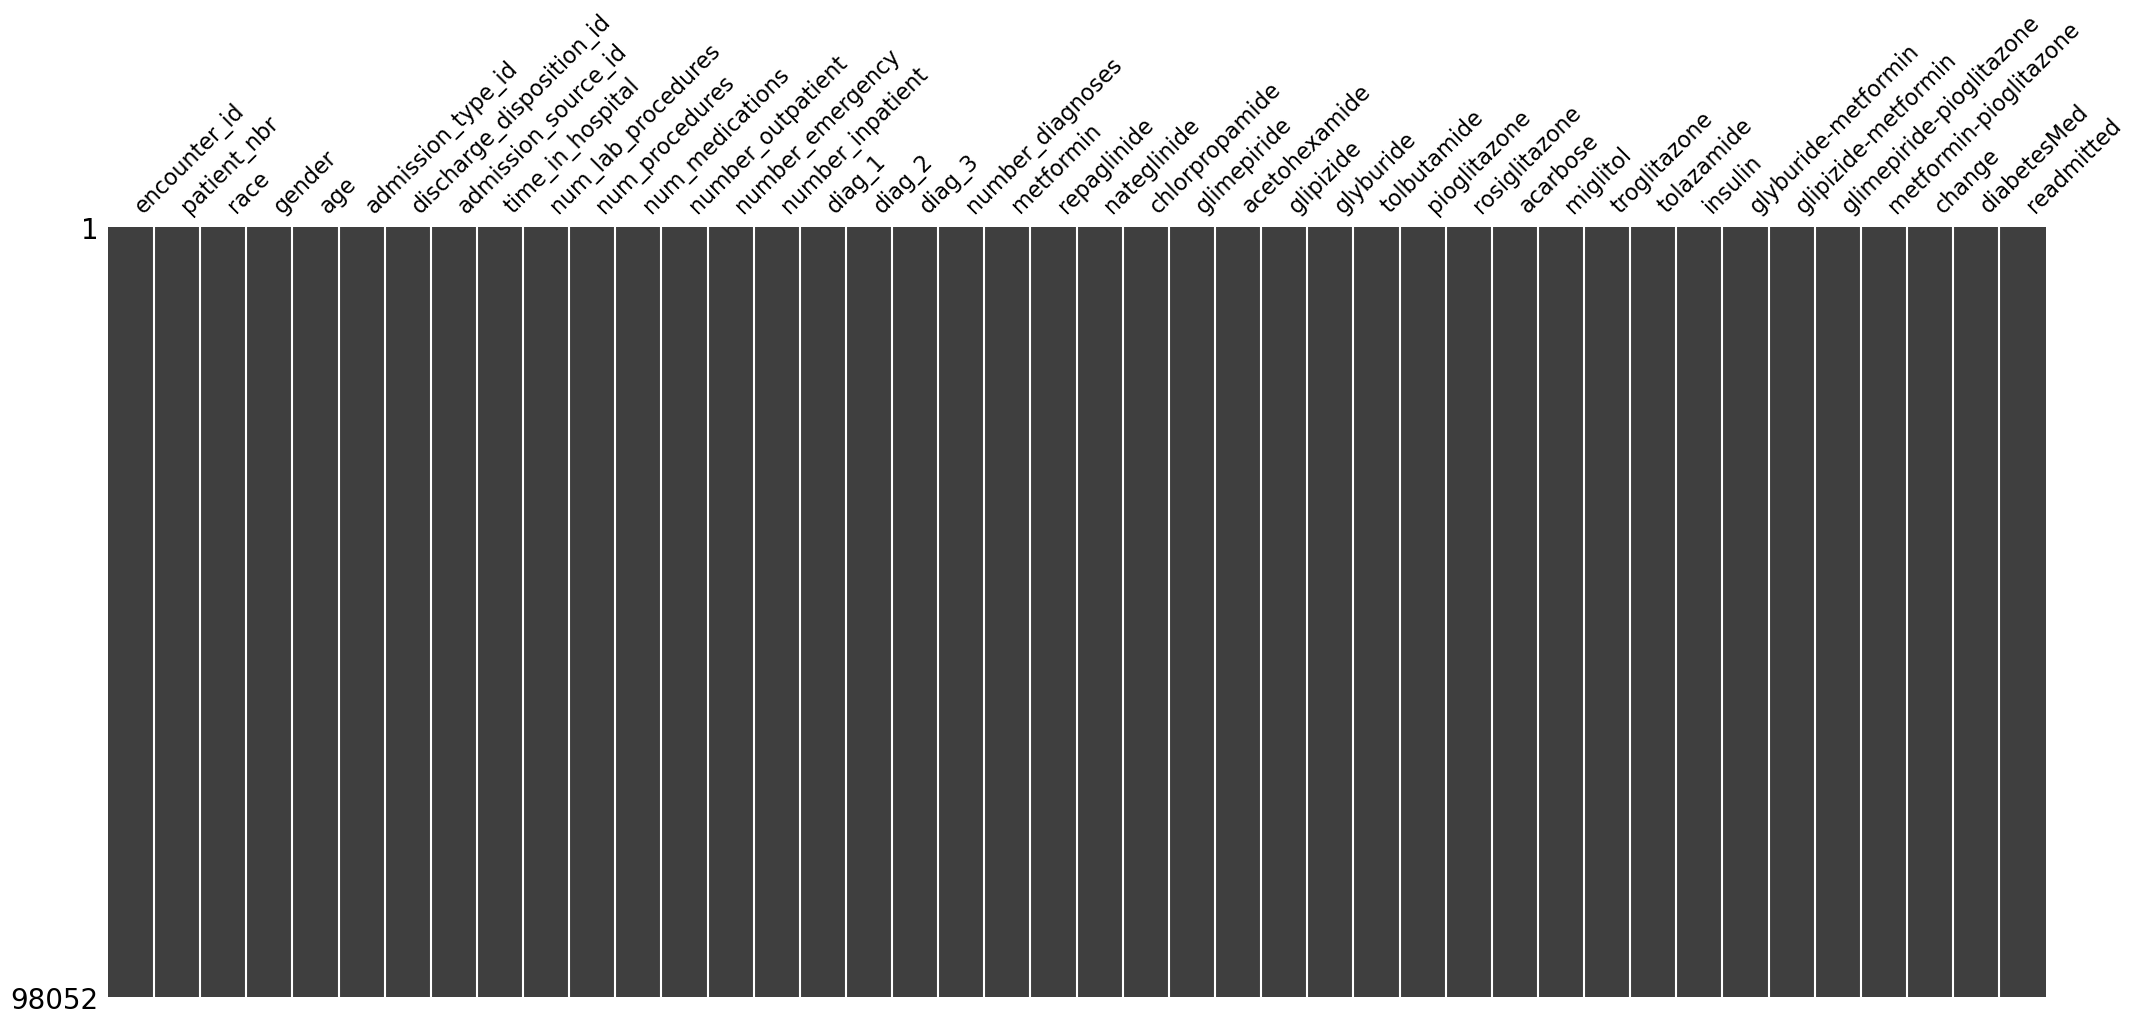

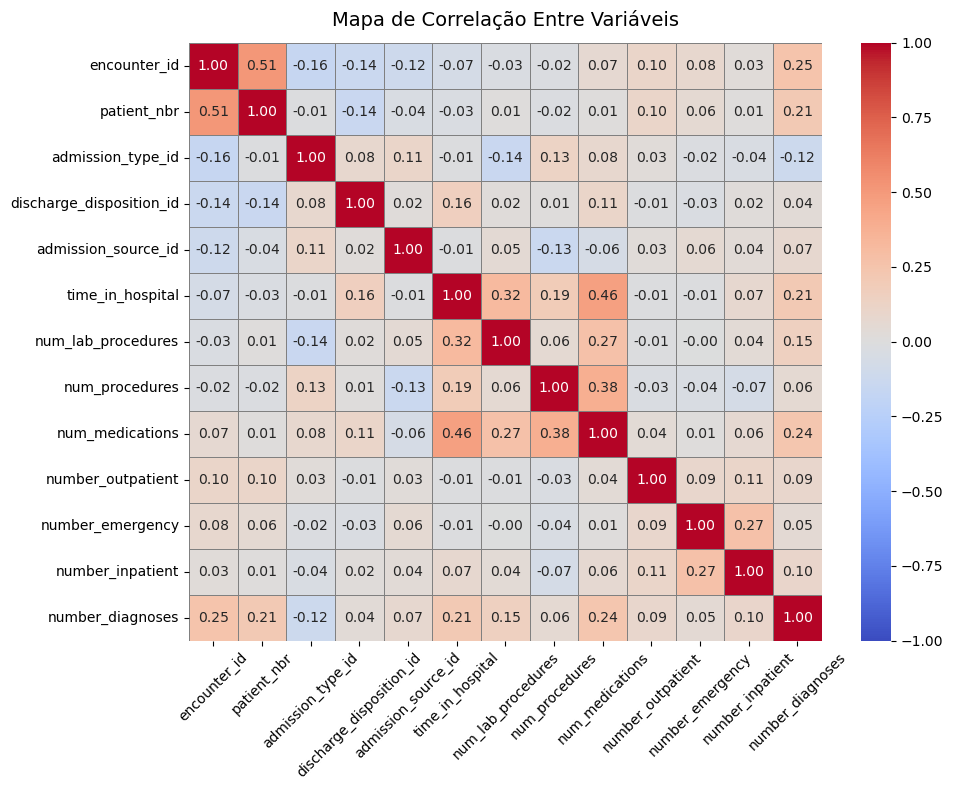

In [47]:
# Realizando a análise exploratória após a limpeza
analise_exploratoria(df)

In [10]:
# Olhando para as 5 primeiras linhas do dataframe
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,No,Up,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,No,Up,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,No,Steady,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,No,Steady,No,No,No,No,No,Yes,>30


# Engenharia de atributos

In [70]:
# Criando uma nova coluna para classificação binária referentea a readmisão
df['Readmitido?'] = df['readmitted'].apply(lambda x: 0 if x =='NO' else 1)

In [17]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Readmitido?
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,Up,No,No,No,No,No,Ch,Yes,>30,1
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,Yes,NO,0
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,Up,No,No,No,No,No,Ch,Yes,NO,0
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,Steady,No,No,No,No,No,Ch,Yes,NO,0
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,Steady,No,No,No,No,No,No,Yes,>30,1


In [35]:
# Verificando a proporção de readmissão

Prop = round(df['Readmitido?'].value_counts(normalize=True) * 100,2)
print(Prop)

Readmitido?
0    53.38
1    46.62
Name: proportion, dtype: float64


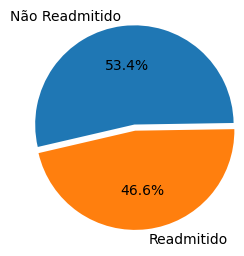

In [36]:
# Verficando graficamente

plt.figure(figsize=(2,8))
plt.pie(Prop, labels=['Não Readmitido', 'Readmitido'],radius=1.6,autopct='%1.1f%%', startangle=0.90,explode=(0.05,0.05))
plt.show()

# Recategorização de categorias

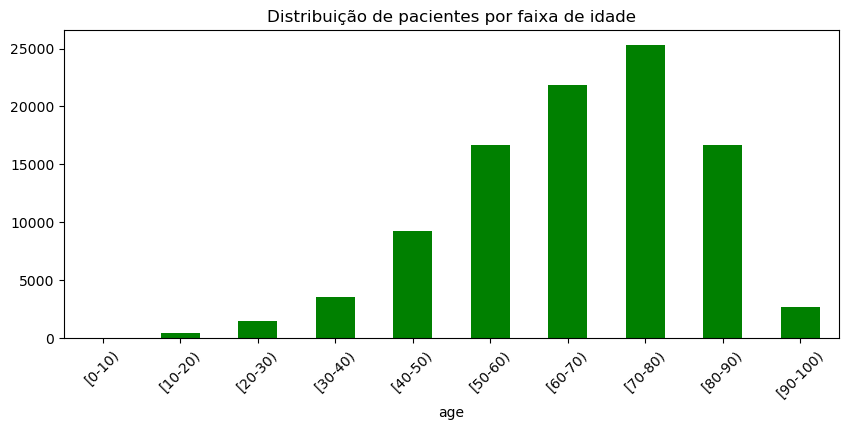

In [72]:
# Verificando a distribuição por faixa de idade
plt.figure(figsize=(10,4))
df.groupby('age').size().plot(kind='bar', color = 'green')
plt.title('Distribuição de pacientes por faixa de idade')
plt.xticks(rotation=45)
plt.show()

In [71]:
# Recategorizamos 'idade' para que a população seja distribuída de maneira mais uniforme

# Classificamos com faixa de 0-50 pacientes de até 50 anos
df['age'] = pd.Series(['[0-50)' if val in [ '[0-10)','[10-20)', '[20-30)','[30-40)','[40-50)' ] else val
                            for val in df['age']], index = df.index)

# Acima de 80 anos ficam na faixa de 80-100
df['age'] = pd.Series(['[80-100)' if val in ['[80-90)', '[90-100)'] else val
                for val in df['age']], index = df.index)

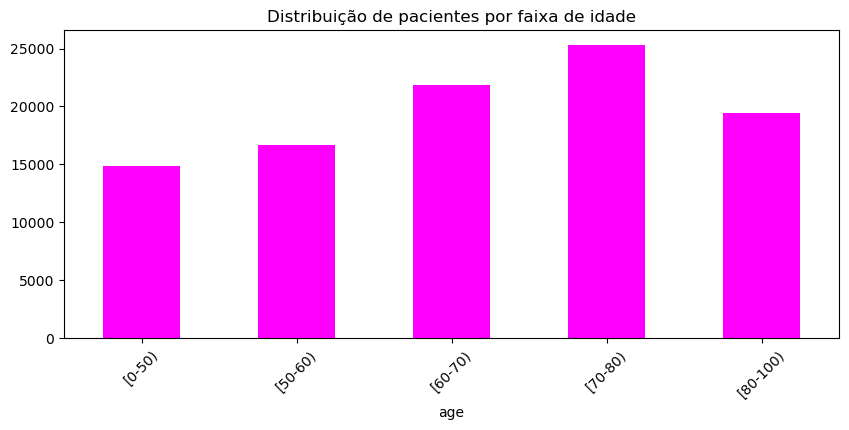

In [77]:
# Resultado da Recategrização das categorias de idade
plt.figure(figsize=(10,4))
df.groupby('age').size().plot(kind='bar', color = 'magenta')
plt.title('Distribuição de pacientes por faixa de idade')
plt.xticks(rotation=45)
plt.show()

# Engenharia de atributo (Realizando agrupamento)

In [21]:
# Verificando o id do tipo de admissão
df['admission_type_id'].unique()

array([1, 2, 3, 6, 4, 5, 8, 7], dtype=int64)

In [72]:
# Recategorizando para binário 
df['admission_type_id'] = df['admission_type_id'].apply(lambda x: 'Emergência' if x == 1 else 'Outro')

In [73]:
# Testando
df['admission_type_id'].unique()

array(['Emergência', 'Outro'], dtype=object)

In [24]:
# Verificando a distribuiçãoo
Prop = df['admission_type_id'].value_counts()
Prop

admission_type_id
Emergência    52178
Outro         45874
Name: count, dtype: int64

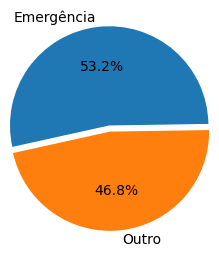

In [25]:
# Verficando graficamente

plt.figure(figsize=(2,8))
plt.pie(Prop, labels=['Emergência', 'Outro'],radius=1.6,autopct='%1.1f%%', startangle=0.90,explode=(0.05,0.05))
plt.show()

# Recategorização para binário

In [26]:
# Verificando as classes da variável
df.discharge_disposition_id.unique()

array([ 1,  3,  6,  2,  5, 11,  7, 25, 10,  4, 14, 18,  8, 13, 12, 16, 17,
       22, 23,  9, 20, 15, 24, 28, 19, 27], dtype=int64)

In [74]:
# Aplicando a recategorização
df.discharge_disposition_id = df['discharge_disposition_id'].apply(lambda x: 'Casa' if x == 1 else 'Outro')

In [75]:
# Verificando o resultado
df.discharge_disposition_id.unique()

array(['Casa', 'Outro'], dtype=object)

In [30]:
# Verificando a distribuição
Prop = df.discharge_disposition_id.value_counts()
Prop

discharge_disposition_id
Casa     57609
Outro    40443
Name: count, dtype: int64

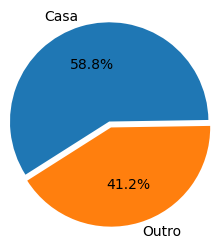

In [31]:
# Verficando graficamente

plt.figure(figsize=(2,8))
plt.pie(Prop, labels=['Casa', 'Outro'],radius=1.6,autopct='%1.1f%%', startangle=0.90,explode=(0.05,0.05))
plt.show()

# Engenharia de atributo e agrupamento

In [76]:
# Verificando as classes
df['admission_source_id'].value_counts()

admission_source_id
7     55951
1     28355
17     6602
4      2945
6      1893
2      1031
5       846
3       179
20      160
9        49
8        15
22       12
10        7
14        2
11        2
25        2
13        1
Name: count, dtype: int64

In [77]:
# Aplicamndo a recategorizaação 
df['admission_source_id'] = df['admission_source_id'].apply(lambda x: 'Sala_Emergencia' if x == 7 
                                                            else 'Recomendação' if x == 1 else 'Outro')

In [51]:
# Verificando a proporção
Prop = df['admission_source_id'].value_counts()
Prop


admission_source_id
Sala_Emergencia    55951
Recomendação       28355
Outro              13746
Name: count, dtype: int64

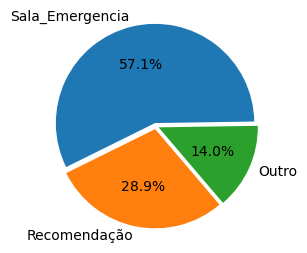

In [53]:
# Verficando graficamente

plt.figure(figsize=(2,8))
plt.pie(Prop, labels=['Sala_Emergencia', 'Recomendação','Outro'],radius=1.6,autopct='%1.1f%%', startangle=0.90,explode=(0.05,0.05,0.05))
plt.show()

# Engenharia de atributos (Diagnósticos)

In [78]:
# Para conseguir visualizar todas as colunas do DataFrame
pd.set_option('display.max_columns', None)

In [79]:
# Salvando 1step 
df.to_excel('step1.xlsx')

In [80]:
# Importando o Step salvo anteriormente para continuar o trabalho
df = pd.read_excel('step1.xlsx', usecols=lambda x: x not in ['Unnamed: 0.1','Unnamed: 0'])

In [81]:
df.shape

(98052, 43)

In [83]:
df.head(2)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Readmitido?
0,149190,55629189,Caucasian,Female,[0-50),Emergência,Casa,Sala_Emergencia,3,59,0,18,0,0,0,276,250.01,255,9,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,Ch,Yes,>30,1
1,64410,86047875,AfricanAmerican,Female,[0-50),Emergência,Casa,Sala_Emergencia,2,11,5,13,2,0,1,648,250,V27,6,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,0


In [84]:
# Salvando as colunas de diagnostico em um novo dataframe para analisar
diagnostico = df[['diag_1', 'diag_2', 'diag_3']]

In [85]:
diagnostico.head()

,diag_1,diag_2,diag_3
0,276,250.01,255
1,648,250,V27
2,8,250.43,403
3,197,157,250
4,414,411,250


In [86]:
# Verificando valores ausentes
diagnostico.isnull().any()

diag_1    False
diag_2    False
diag_3    False
dtype: bool

In [87]:
# Função que calcula a Comorbidade e classifica em 4 categorias
def calcula_comorbidade(row):
    
    # Código 250 indica diabetes
    codigos_doenca_diabetes = "^[2][5][0]"
    
    # Códigos 39x (x = valor entre 0 e 9)
    # Códigos 4zx (z = valor entre 0 e 6 e x = valor entre 0 e 9)
    # Esses códigos indicam problemas circulatórios
    codigos_doenca_circulatorios = "^[3][9][0-9]|^[4][0-6][0-9]"
    
    # Inicializa variável de retorno
    valor = 0
    
    # Valor 0 indica que:
    # Diabetes e problemas circulatórios não foram detectados de forma simultânea no paciente
    if(not(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_1']))))) and
       not(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_2']))))) and 
       not(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_3'])))))) and (not(
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_1']))))) and not(
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_2']))))) and not(
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_3'])))))):
        valor = 0
        
    # Valor 1 indica que:
    # Pelo menos um diagnóstico de diabetes e problemas circulatórios foram detectados de forma 
    # simultânea no paciente
    if(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_1'])))) or 
       bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_2'])))) or 
       bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_3']))))) and (not(
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_1']))))) and not(
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_2']))))) and not(
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_3'])))))): 
        valor = 1
        
    # Valor 2 indica que:
    # Diabetes e pelo menos um diagnóstico de problemas circulatórios foram detectados de forma 
    # simultânea no paciente
    if(not(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_1']))))) and
       not(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_2']))))) and 
       not(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_3'])))))) and (
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_1'])))) or 
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_2'])))) or 
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_3']))))):
        valor = 2
        
    # Valor 3 indica que:
    # Pelo menos um diagnóstico de diabetes e pelo menos um diagnóstico de problemas circulatórios 
    # foram detectados de forma simultânea no paciente
    if(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_1'])))) or 
       bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_2'])))) or 
       bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_3']))))) and (
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_1'])))) or 
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_2'])))) or 
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_3']))))):
        valor = 3 
    
    return valor

In [43]:
# Aplicando no dataframe original
tqdm.pandas()
df['comorbidade'] = diagnostico.progress_apply(calcula_comorbidade, axis = 1)

100%|██████████████████████████████████████████████████████████████████████████| 98052/98052 [00:14<00:00, 6610.48it/s]


In [44]:
# Verificabdo resultados
df['comorbidade'].value_counts()

comorbidade
2    39807
0    22389
1    17984
3    17872
Name: count, dtype: int64

In [45]:
# Dropando as colunas desnecessárias
df.drop(columns=['diag_1','diag_2','diag_3'],axis=1,inplace=True)

In [46]:
df.head(3)

,Unnamed: 0,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Readmitido?,comorbidade
0,1,149190,55629189,Caucasian,Female,[0-50),Emergência,Casa,Sala_Emergencia,3,59,0,18,0,0,0,9,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,Ch,Yes,>30,1,1
1,2,64410,86047875,AfricanAmerican,Female,[0-50),Emergência,Casa,Sala_Emergencia,2,11,5,13,2,0,1,6,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,0,1
2,3,500364,82442376,Caucasian,Male,[0-50),Emergência,Casa,Sala_Emergencia,2,44,1,16,0,0,0,7,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,Ch,Yes,NO,0,3


In [47]:
# Calcula o percentual de comorbidade por tipo e por classe da variável alvo
percent_comorbidade = round(pd.crosstab(df['comorbidade'],df['Readmitido?'], normalize='index') * 100,2)

In [48]:
percent_comorbidade

Readmitido?,0,1
comorbidade,,
0,55.51,44.49
1,53.83,46.17
2,51.78,48.22
3,53.80,46.20


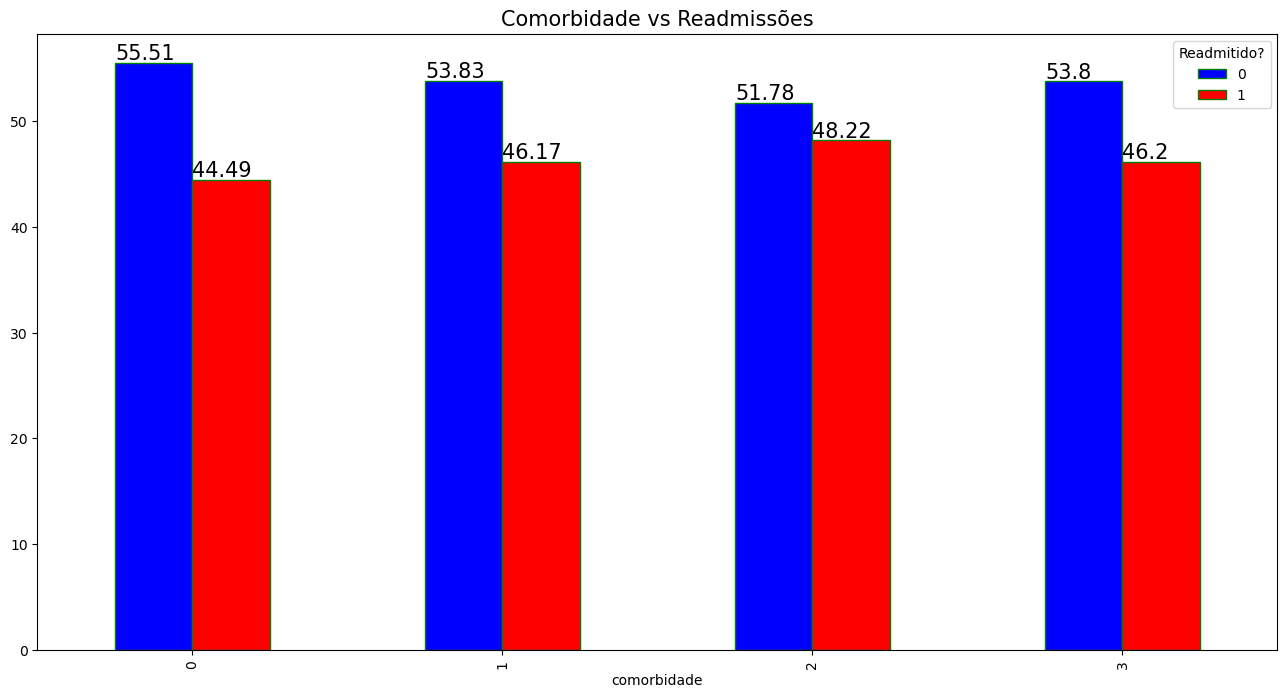

In [49]:
# Plot

# Prepara a figura a partir dos dados
fig = percent_comorbidade.plot(kind = 'bar', 
                       figsize = (16, 8), 
                       width = 0.5, 
                       edgecolor = 'g', 
                       color = ['b','r'])

# Desenha cada grupo
for i in fig .patches:
    fig.text(i.get_x() + 0.00, 
             i.get_height() + 0.3, 
             str(round((i.get_height()), 2)), 
             fontsize = 15, 
             color = 'black',
             rotation = 0)

# Título e Print
plt.title("Comorbidade vs Readmissões", fontsize = 15)
plt.show()

In [50]:
# Legenda do gráfico:

# Valor 0 indica que:
# Diabetes e problemas circulatórios não foram detectados de forma simultânea no paciente

# Valor 1 indica que:
# Pelo menos um diagnóstico de diabetes E problemas circulatórios foram detectados de forma simultânea no paciente

# Valor 2 indica que:
# Diabetes e pelo menos um diagnóstico de problemas circulatórios foram detectados de forma simultânea no paciente

# Valor 3 indica que:
# Pelo menos um diagnóstico de diabetes e pelo menos um dianóstico de problemas circulatórios foram detectados de 
# forma simultânea no paciente

In [51]:
df.head()

,Unnamed: 0,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Readmitido?,comorbidade
0,1,149190,55629189,Caucasian,Female,[0-50),Emergência,Casa,Sala_Emergencia,3,59,0,18,0,0,0,9,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,Ch,Yes,>30,1,1
1,2,64410,86047875,AfricanAmerican,Female,[0-50),Emergência,Casa,Sala_Emergencia,2,11,5,13,2,0,1,6,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,0,1
2,3,500364,82442376,Caucasian,Male,[0-50),Emergência,Casa,Sala_Emergencia,2,44,1,16,0,0,0,7,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,Ch,Yes,NO,0,3
3,4,16680,42519267,Caucasian,Male,[0-50),Emergência,Casa,Sala_Emergencia,1,51,0,8,0,0,0,5,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,Ch,Yes,NO,0,1
4,5,35754,82637451,Caucasian,Male,[50-60),Outro,Casa,Outro,3,31,6,16,0,0,0,9,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Yes,>30,1,3


In [52]:
# Lista com os nomes das variáveis de medicamentos (3 variáveis já tinham sido removidas)
medicamentos = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 
                'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 
                'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 
                'glimepiride-pioglitazone', 'metformin-pioglitazone']

In [53]:
for col in tqdm(medicamentos):

    if col in df.columns:
        colname = str(col) + "_temp"
        df[colname] = df[col].apply(lambda x: 0 if (x== 'No' or x =='Steady') else 1)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 21.01it/s]


In [55]:
df.head()

,Unnamed: 0,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Readmitido?,comorbidade,metformin_temp,repaglinide_temp,nateglinide_temp,chlorpropamide_temp,glimepiride_temp,acetohexamide_temp,glipizide_temp,glyburide_temp,tolbutamide_temp,pioglitazone_temp,rosiglitazone_temp,acarbose_temp,miglitol_temp,troglitazone_temp,tolazamide_temp,insulin_temp,glyburide-metformin_temp,glipizide-metformin_temp,glimepiride-pioglitazone_temp,metformin-pioglitazone_temp
0,1,149190,55629189,Caucasian,Female,[0-50),Emergência,Casa,Sala_Emergencia,3,59,0,18,0,0,0,9,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,Ch,Yes,>30,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2,64410,86047875,AfricanAmerican,Female,[0-50),Emergência,Casa,Sala_Emergencia,2,11,5,13,2,0,1,6,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,500364,82442376,Caucasian,Male,[0-50),Emergência,Casa,Sala_Emergencia,2,44,1,16,0,0,0,7,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,Ch,Yes,NO,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,16680,42519267,Caucasian,Male,[0-50),Emergência,Casa,Sala_Emergencia,1,51,0,8,0,0,0,5,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,Ch,Yes,NO,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,35754,82637451,Caucasian,Male,[50-60),Outro,Casa,Outro,3,31,6,16,0,0,0,9,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Yes,>30,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [56]:
# Step 

df.to_excel('step2.xlsx')

In [58]:
# Cria uma variável para receber a contagem por paciente
df['num_alt_dosagem_med'] = 0

In [59]:
df.head()

,Unnamed: 0,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Readmitido?,comorbidade,metformin_temp,repaglinide_temp,nateglinide_temp,chlorpropamide_temp,glimepiride_temp,acetohexamide_temp,glipizide_temp,glyburide_temp,tolbutamide_temp,pioglitazone_temp,rosiglitazone_temp,acarbose_temp,miglitol_temp,troglitazone_temp,tolazamide_temp,insulin_temp,glyburide-metformin_temp,glipizide-metformin_temp,glimepiride-pioglitazone_temp,metformin-pioglitazone_temp,num_alt_dosagem_med
0,1,149190,55629189,Caucasian,Female,[0-50),Emergência,Casa,Sala_Emergencia,3,59,0,18,0,0,0,9,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,Ch,Yes,>30,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2,64410,86047875,AfricanAmerican,Female,[0-50),Emergência,Casa,Sala_Emergencia,2,11,5,13,2,0,1,6,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,500364,82442376,Caucasian,Male,[0-50),Emergência,Casa,Sala_Emergencia,2,44,1,16,0,0,0,7,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,Ch,Yes,NO,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,4,16680,42519267,Caucasian,Male,[0-50),Emergência,Casa,Sala_Emergencia,1,51,0,8,0,0,0,5,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,Ch,Yes,NO,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,35754,82637451,Caucasian,Male,[50-60),Outro,Casa,Outro,3,31,6,16,0,0,0,9,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Yes,>30,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [60]:
for col in tqdm(medicamentos):

    if col in df.columns:

        colname = str(col) + '_temp'
        df['num_alt_dosagem_med'] = df['num_alt_dosagem_med'] + df[colname]

    

100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 107.80it/s]


In [61]:
df.head()

,Unnamed: 0,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Readmitido?,comorbidade,metformin_temp,repaglinide_temp,nateglinide_temp,chlorpropamide_temp,glimepiride_temp,acetohexamide_temp,glipizide_temp,glyburide_temp,tolbutamide_temp,pioglitazone_temp,rosiglitazone_temp,acarbose_temp,miglitol_temp,troglitazone_temp,tolazamide_temp,insulin_temp,glyburide-metformin_temp,glipizide-metformin_temp,glimepiride-pioglitazone_temp,metformin-pioglitazone_temp,num_alt_dosagem_med
0,1,149190,55629189,Caucasian,Female,[0-50),Emergência,Casa,Sala_Emergencia,3,59,0,18,0,0,0,9,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,Ch,Yes,>30,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,2,64410,86047875,AfricanAmerican,Female,[0-50),Emergência,Casa,Sala_Emergencia,2,11,5,13,2,0,1,6,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,500364,82442376,Caucasian,Male,[0-50),Emergência,Casa,Sala_Emergencia,2,44,1,16,0,0,0,7,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,Ch,Yes,NO,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,4,16680,42519267,Caucasian,Male,[0-50),Emergência,Casa,Sala_Emergencia,1,51,0,8,0,0,0,5,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,Ch,Yes,NO,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,35754,82637451,Caucasian,Male,[50-60),Outro,Casa,Outro,3,31,6,16,0,0,0,9,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Yes,>30,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [62]:
df.num_alt_dosagem_med.value_counts()

num_alt_dosagem_med
0    71309
1    25350
2     1281
3      107
4        5
Name: count, dtype: int64

In [66]:
# Recoding das colunas de medicamentos
for col in tqdm(medicamentos):
    if col in df.columns:
        df[col] = df[col].replace('No', 0)
        df[col] = df[col].replace('Steady', 1)
        df[col] = df[col].replace('Up', 1)
        df[col] = df[col].replace('Down', 1) 

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 23.69it/s]


In [67]:
df.head()

,Unnamed: 0,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Readmitido?,comorbidade,metformin_temp,repaglinide_temp,nateglinide_temp,chlorpropamide_temp,glimepiride_temp,acetohexamide_temp,glipizide_temp,glyburide_temp,tolbutamide_temp,pioglitazone_temp,rosiglitazone_temp,acarbose_temp,miglitol_temp,troglitazone_temp,tolazamide_temp,insulin_temp,glyburide-metformin_temp,glipizide-metformin_temp,glimepiride-pioglitazone_temp,metformin-pioglitazone_temp,num_alt_dosagem_med
0,1,149190,55629189,Caucasian,Female,[0-50),Emergência,Casa,Sala_Emergencia,3,59,0,18,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,Ch,Yes,>30,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,2,64410,86047875,AfricanAmerican,Female,[0-50),Emergência,Casa,Sala_Emergencia,2,11,5,13,2,0,1,6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,No,Yes,NO,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,500364,82442376,Caucasian,Male,[0-50),Emergência,Casa,Sala_Emergencia,2,44,1,16,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,Ch,Yes,NO,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,4,16680,42519267,Caucasian,Male,[0-50),Emergência,Casa,Sala_Emergencia,1,51,0,8,0,0,0,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,Ch,Yes,NO,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,35754,82637451,Caucasian,Male,[50-60),Outro,Casa,Outro,3,31,6,16,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,No,Yes,>30,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [69]:
# Variável com a contagem de medicamentos por paciente
df['num_med'] = 0

In [71]:
# Carregamos a nova variável
for col in tqdm(medicamentos):
    if col in df.columns:
        df['num_med'] = df['num_med'] + df[col]

100%|████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 1588.72it/s]


In [72]:
df.head()

,Unnamed: 0,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Readmitido?,comorbidade,metformin_temp,repaglinide_temp,nateglinide_temp,chlorpropamide_temp,glimepiride_temp,acetohexamide_temp,glipizide_temp,glyburide_temp,tolbutamide_temp,pioglitazone_temp,rosiglitazone_temp,acarbose_temp,miglitol_temp,troglitazone_temp,tolazamide_temp,insulin_temp,glyburide-metformin_temp,glipizide-metformin_temp,glimepiride-pioglitazone_temp,metformin-pioglitazone_temp,num_alt_dosagem_med,num_med
0,1,149190,55629189,Caucasian,Female,[0-50),Emergência,Casa,Sala_Emergencia,3,59,0,18,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,Ch,Yes,>30,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,2,64410,86047875,AfricanAmerican,Female,[0-50),Emergência,Casa,Sala_Emergencia,2,11,5,13,2,0,1,6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,No,Yes,NO,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,3,500364,82442376,Caucasian,Male,[0-50),Emergência,Casa,Sala_Emergencia,2,44,1,16,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,Ch,Yes,NO,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
3,4,16680,42519267,Caucasian,Male,[0-50),Emergência,Casa,Sala_Emergencia,1,51,0,8,0,0,0,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,Ch,Yes,NO,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
4,5,35754,82637451,Caucasian,Male,[50-60),Outro,Casa,Outro,3,31,6,16,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,No,Yes,>30,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [73]:
# Verifica o total de medicamentos
df['num_med'].value_counts()

num_med
1    45447
0    22702
2    21056
3     7485
4     1300
5       57
6        5
Name: count, dtype: int64

In [74]:
df.drop(columns=medicamentos, axis=1, inplace=True)

In [75]:
df.head()

,Unnamed: 0,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabetesMed,readmitted,Readmitido?,comorbidade,metformin_temp,repaglinide_temp,nateglinide_temp,chlorpropamide_temp,glimepiride_temp,acetohexamide_temp,glipizide_temp,glyburide_temp,tolbutamide_temp,pioglitazone_temp,rosiglitazone_temp,acarbose_temp,miglitol_temp,troglitazone_temp,tolazamide_temp,insulin_temp,glyburide-metformin_temp,glipizide-metformin_temp,glimepiride-pioglitazone_temp,metformin-pioglitazone_temp,num_alt_dosagem_med,num_med
0,1,149190,55629189,Caucasian,Female,[0-50),Emergência,Casa,Sala_Emergencia,3,59,0,18,0,0,0,9,Ch,Yes,>30,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,2,64410,86047875,AfricanAmerican,Female,[0-50),Emergência,Casa,Sala_Emergencia,2,11,5,13,2,0,1,6,No,Yes,NO,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,3,500364,82442376,Caucasian,Male,[0-50),Emergência,Casa,Sala_Emergencia,2,44,1,16,0,0,0,7,Ch,Yes,NO,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
3,4,16680,42519267,Caucasian,Male,[0-50),Emergência,Casa,Sala_Emergencia,1,51,0,8,0,0,0,5,Ch,Yes,NO,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
4,5,35754,82637451,Caucasian,Male,[50-60),Outro,Casa,Outro,3,31,6,16,0,0,0,9,No,Yes,>30,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Recoding de variáveis categóricas

In [7]:
df['change'].value_counts()

change
No    52774
Ch    45278
Name: count, dtype: int64

In [9]:
df['gender'].value_counts()

gender
Female    52833
Male      45219
Name: count, dtype: int64

In [10]:
df['diabetesMed'].value_counts()

diabetesMed
Yes    75350
No     22702
Name: count, dtype: int64

In [11]:
# Recodificando as variáveis
df['change'] =  df['change'].replace('Ch',1)
df['change'] =  df['change'].replace('No',0)
df['gender'] = df['gender'].replace('Female',0)
df['gender'] = df['gender'].replace('Male',1)
df['diabetesMed'] = df['diabetesMed'].replace('No',0)
df['diabetesMed'] = df['diabetesMed'].replace('Yes',1)

In [12]:
# Resultado
df.head(2)

,Unnamed: 0.1,Unnamed: 0,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,...,rosiglitazone_temp,acarbose_temp,miglitol_temp,troglitazone_temp,tolazamide_temp,insulin_temp,glyburide-metformin_temp,glipizide-metformin_temp,glimepiride-pioglitazone_temp,metformin-pioglitazone_temp
0,0,1,149190,55629189,Caucasian,0,[0-50),Emergência,Casa,Sala_Emergencia,...,0,0,0,0,0,1,0,0,0,0
1,1,2,64410,86047875,AfricanAmerican,0,[0-50),Emergência,Casa,Sala_Emergencia,...,0,0,0,0,0,0,0,0,0,0


Trabalho concluído

Proximo passo: Modelo preditivo para identificar se o paciente será readmitido ou não e qual a probabilidade de isso acontecer

In [2]:
# Marca d'agua e versões
%reload_ext watermark
%watermark --iversion
%watermark -a "Guilherme"

seaborn   : 0.13.2
numpy     : 1.26.4
watermark : 2.5.0
matplotlib: 3.9.2
tqdm      : 4.66.5
missingno : 0.5.2
pandas    : 2.2.2
re        : 2.2.1

Author: Guilherme

